# III-Project-Step 1

At this first stage of your project, complete the following tasks by providing your notebook (in .pybn format or
converted to HTML):
## 1. Describe analysis of your data

### 1. Dataset Context and Source
The dataset used in this project is based on vulnerability data from the National Vulnerability Database (NVD) and Common Vulnerabilities and Exposures (CVE) repositories.
It specifically targets security flaws found in smart home IoT devices, such as:
- IP Cameras (e.g., Ring, D-Link, Hikvision)
- Voice Assistants (e.g., Amazon Echo, Google Home)
- Smart Sensors (e.g., motion detectors, thermostats, light sensors)

These devices, which are increasingly used in connected homes, often contain software or firmware weaknesses that can be exploited by attackers to gain unauthorized access, perform data exfiltration, or disrupt normal operation.

The dataset (data.json) was extracted from NVD’s CVE feed.
Each entry corresponds to a unique vulnerability (identified by its CVE ID) and includes structured information such as:
| Attribute                                     | Description                                                                             |
| --------------------------------------------- | --------------------------------------------------------------------------------------- |
| `cve.id`                                      | Unique identifier of the vulnerability (e.g., CVE-2021-12345)                           |
| `cve.descriptions`                            | Natural language description of the vulnerability (English + possibly other languages)  |
| `cve.published`                               | Date when the vulnerability was published in NVD                                        |
| `cve.metrics.cvssMetricV2.cvssData.baseScore` | Numerical CVSS (Common Vulnerability Scoring System) score between 0 and 10             |
| `cve.metrics.cvssMetricV2.baseSeverity`       | Severity level (Low, Medium, High, Critical)                                            |
| `cve.weaknesses.description`                  | Category of the vulnerability (CWE type, e.g., CWE-79 for Cross-Site Scripting)         |
| `cve.configurations.nodes.cpeMatch.criteria`  | Product, vendor and software affected (e.g., `cpe:2.3:o:google:home:1.0:*:*:*:*:*:*:*`) |
| `cve.references.url`                          | External references or advisories describing the issue                                  |

### 2. Data Collection & Filtering

This dataset was built using two scripts:
1. **importData.py** — retrieves all 317,000 CVEs via the official NVD API (2,000 per request).
2. **filterData.py** — filters only vulnerabilities related to Smart Home IoT devices using keyword-based search on descriptions and affected CPEs.

The final IoT dataset (`data_iot.json`) is used for all analyses below.


### 3. Objective of the Descriptive Analysis

The purpose of this first stage is to:
1. Understand the structure and content of the dataset.
2. Quantify how many vulnerabilities exist and their severity distribution.
3. Identify temporal trends (how vulnerabilities evolved over the years).
4. Highlight the most affected vendors and IoT products.
5. Detect common weakness patterns (e.g., authentication flaws, buffer overflows, code execution, data exposure).

This step sets the foundation for later stages of preprocessing, classification and predictive analysis, which will aim to automatically categorize vulnerabilities or predict their severity.

### 4. Data Overview

After loading the dataset, we find that it contains around 317,000 entries, covering vulnerabilities from 1988 up to 2025 according to the metadata (NVD version 2.0, timestamp 2025-11-06).
However, for the project’s scope, we will later focus on IoT-related devices by filtering CVEs mentioning keywords such as camera, sensor, voice, smart home, IoT, etc.

A preliminary inspection reveals:
- Each record is a nested JSON structure with multiple levels (CVE → metrics → configurations → references).
- The dataset includes both historical vulnerabilities (pre-2000, for systems like SunOS or VMS) and modern IoT-related ones (2020–2025).
- CVSS 2.0 metrics are available for most records, allowing quantitative severity analysis.


### 5. Analytical Questions

The descriptive analysis will answer:
- How have vulnerabilities evolved over time?
- Which IoT products or vendors are most affected?
- What is the distribution of severity levels?
- Which weakness types (CWE) are the most common in smart home devices?
- Can we observe trends linked to the growth of connected devices (e.g. post-2015 IoT boom)?

### Step 1: Basic Information
We'll start by:
- Loading the dataset (JSON → DataFrame).
- Counting total vulnerabilities.
- Inspecting key columns (CVE ID, CVSS score, description, product).

In [3]:
import pandas as pd
import json

# Load JSON data
with open("data_iot.json", encoding="utf-8") as f:
    data = json.load(f)

# Extract vulnerability list
vulns = data["vulnerabilities"]

# Normalize JSON into a DataFrame
df = pd.json_normalize(vulns)

# Basic structure
print("Number of vulnerabilities:", len(df))
df.info()
df.head(3)


Number of vulnerabilities: 8833
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8833 entries, 0 to 8832
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   cve.id                     8833 non-null   object
 1   cve.sourceIdentifier       8833 non-null   object
 2   cve.published              8833 non-null   object
 3   cve.lastModified           8833 non-null   object
 4   cve.vulnStatus             8833 non-null   object
 5   cve.cveTags                8833 non-null   object
 6   cve.descriptions           8833 non-null   object
 7   cve.metrics.cvssMetricV2   5419 non-null   object
 8   cve.weaknesses             8705 non-null   object
 9   cve.configurations         8279 non-null   object
 10  cve.references             8833 non-null   object
 11  cve.metrics.cvssMetricV31  6960 non-null   object
 12  cve.vendorComments         43 non-null     object
 13  cve.evaluatorSolution      9 no

,cve.id,cve.sourceIdentifier,cve.published,cve.lastModified,cve.vulnStatus,cve.cveTags,cve.descriptions,cve.metrics.cvssMetricV2,cve.weaknesses,cve.configurations,...,cve.vendorComments,cve.evaluatorSolution,cve.evaluatorComment,cve.evaluatorImpact,cve.cisaExploitAdd,cve.cisaActionDue,cve.cisaRequiredAction,cve.cisaVulnerabilityName,cve.metrics.cvssMetricV30,cve.metrics.cvssMetricV40
0,CVE-1999-0257,cve@mitre.org,1998-04-01T05:00:00.000,2025-04-03T01:03:51.193,Deferred,[],"[{'lang': 'en', 'value': 'Nestea variation of ...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'nodes': [{'operator': 'OR', 'negate': False...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CVE-1999-1499,cve@mitre.org,1998-04-10T04:00:00.000,2025-04-03T01:03:51.193,Deferred,[],"[{'lang': 'en', 'value': 'named in ISC BIND 4....","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'nodes': [{'operator': 'OR', 'negate': False...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-1999-1292,cve@mitre.org,1998-09-01T04:00:00.000,2025-04-03T01:03:51.193,Deferred,[],"[{'lang': 'en', 'value': 'Buffer overflow in w...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'nodes': [{'operator': 'OR', 'negate': False...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2: Summary Statistics
We'll describe:
- Distribution of CVSS scores
- Distribution of severity levels (Low/Medium/High/Critical)
- Publication years (trend of vulnerabilities over time)

In [4]:
# Extract useful columns
df['cve.id'] = df['cve.id']
df['published'] = pd.to_datetime(df['cve.published'], errors='coerce')
df['cvss_score'] = df['cve.metrics.cvssMetricV2'].apply(lambda x: x[0]['cvssData']['baseScore'] if isinstance(x, list) else None)
df['severity'] = df['cve.metrics.cvssMetricV2'].apply(lambda x: x[0]['baseSeverity'] if isinstance(x, list) else None)

# Summary
print(df['severity'].value_counts())
df['cvss_score'].describe()

severity
MEDIUM    3129
HIGH      1715
LOW        575
Name: count, dtype: int64


count    5419.000000
mean        5.945230
std         1.993258
min         1.200000
25%         4.400000
50%         5.800000
75%         7.200000
max        10.000000
Name: cvss_score, dtype: float64

### Step 3: Temporal Analysis

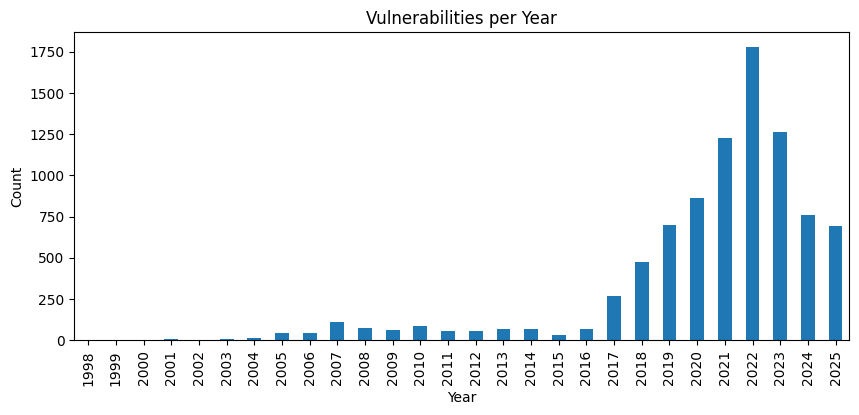

In [5]:
import matplotlib.pyplot as plt

df['year'] = df['published'].dt.year
df.groupby('year').size().plot(kind='bar', figsize=(10,4), title='Vulnerabilities per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Step 4: Top Vulnerable Vendors or Devices
We can extract vendor/product names from the “configurations” field.

In [6]:
def extract_products(configs):
    products = []
    if isinstance(configs, list):
        for node in configs:
            for cpe in node.get('nodes', []):
                for match in cpe.get('cpeMatch', []):
                    crit = match.get('criteria', '')
                    if crit:
                        parts = crit.split(':')
                        if len(parts) > 4:
                            products.append(parts[4])
    return products

df['products'] = df['cve.configurations'].apply(extract_products)

Then we can display:

The most affected manufacturers (e.g., sun, hp, cisco, sgi).

The most vulnerable types of systems.

In [7]:
from collections import Counter
products = Counter([p for sub in df['products'] for p in sub])
pd.DataFrame(products.most_common(10), columns=['Vendor/Product', 'Count'])

,Vendor/Product,Count
0,linux_kernel,3316
1,tensorflow,1239
2,junos,967
3,fedora,807
4,sdx55,725
5,sdx55_firmware,694
6,debian_linux,693
7,qcs605,689
8,qcs605_firmware,661
9,firefox,626


### Step 5: Textual Analysis (Vulnerability Description)

We can look at frequent keywords in descriptions to identify common weaknesses:

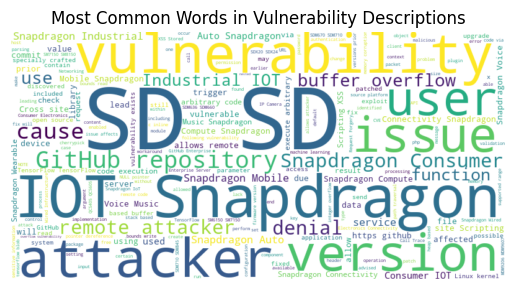

In [9]:
from wordcloud import WordCloud
text = " ".join(df['cve.descriptions'].apply(lambda x: x[0]['value'] if isinstance(x, list) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Vulnerability Descriptions")
plt.show()

## 2. Implementation of the necessary pre-processing

### Data Loading and Normalization

In [51]:
import pandas as pd
import json

# Load dataset
with open("data_iot.json", encoding="utf-8") as f:
    data = json.load(f)

# Extract list of vulnerabilities
vulns = data["vulnerabilities"]

# Normalize nested JSON to flat table
df = pd.json_normalize(vulns)

print("Shape:", df.shape)
df.head(2)

Shape: (8833, 22)


,cve.id,cve.sourceIdentifier,cve.published,cve.lastModified,cve.vulnStatus,cve.cveTags,cve.descriptions,cve.metrics.cvssMetricV2,cve.weaknesses,cve.configurations,...,cve.vendorComments,cve.evaluatorSolution,cve.evaluatorComment,cve.evaluatorImpact,cve.cisaExploitAdd,cve.cisaActionDue,cve.cisaRequiredAction,cve.cisaVulnerabilityName,cve.metrics.cvssMetricV30,cve.metrics.cvssMetricV40
0,CVE-1999-0257,cve@mitre.org,1998-04-01T05:00:00.000,2025-04-03T01:03:51.193,Deferred,[],"[{'lang': 'en', 'value': 'Nestea variation of ...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'nodes': [{'operator': 'OR', 'negate': False...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CVE-1999-1499,cve@mitre.org,1998-04-10T04:00:00.000,2025-04-03T01:03:51.193,Deferred,[],"[{'lang': 'en', 'value': 'named in ISC BIND 4....","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'nodes': [{'operator': 'OR', 'negate': False...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-processing

In [ ]:
def first(lst, cond=lambda _: True, default=None):
    if isinstance(lst, list):
        for x in lst:
            if cond(x):
                return x
    return default

def get_english_description(desc_list):
    if not isinstance(desc_list, list):
        return None
    # prefer English; fallback to first available
    d_en = first(desc_list, cond=lambda d: d.get("lang")=="en")
    d_any = desc_list[0] if desc_list else None
    return (d_en or d_any or {}).get("value")

def pick_cvss_and_severity(metrics):
    """
    Returns: (version, baseScore, baseSeverity, exploitabilityScore, impactScore)
    Priority: v3.1 -> v3.0 -> v2
    """
    if not isinstance(metrics, dict):
        return (None, None, None, None, None)

    # v3.1
    v31 = metrics.get("cvssMetricV31")
    if isinstance(v31, list) and v31:
        m = v31[0]
        d = m.get("cvssData", {})
        return (
            d.get("version") or "3.1",
            d.get("baseScore"),
            m.get("baseSeverity"),
            m.get("exploitabilityScore"),
            m.get("impactScore"),
        )

    # v3.0
    v30 = metrics.get("cvssMetricV30")
    if isinstance(v30, list) and v30:
        m = v30[0]
        d = m.get("cvssData", {})
        return (
            d.get("version") or "3.0",
            d.get("baseScore"),
            m.get("baseSeverity"),
            m.get("exploitabilityScore"),
            m.get("impactScore"),
        )

    # v2
    v2 = metrics.get("cvssMetricV2")
    if isinstance(v2, list) and v2:
        m = v2[0]
        d = m.get("cvssData", {})
        return (
            d.get("version") or "2.0",
            d.get("baseScore"),
            m.get("baseSeverity"),
            m.get("exploitabilityScore"),
            m.get("impactScore"),
        )

    return (None, None, None, None, None)

def extract_cwe(weaknesses):
    """
    weaknesses: list of { description: [ {lang, value}, ... ] }
    Returns a human string, and tries to extract a CWE ID (CWE-xxx) if present.
    """
    if not isinstance(weaknesses, list) or not weaknesses:
        return None, None
    # Prefer English description
    desc = first(weaknesses, default={}).get("description", [])
    val = get_english_description(desc)
    if not val:
        return None, None
    # Try to detect CWE-123 pattern
    m = re.search(r"(CWE-\d+)", val)
    cwe_id = m.group(1) if m else None
    return val, cwe_id

def iter_cpe_criteria(configurations):
    """
    Yield all CPE 2.3 criteria strings under configurations[*].nodes[*].cpeMatch[*].criteria
    """
    if not isinstance(configurations, list):
        return
    for cfg in configurations:
        for node in cfg.get("nodes", []):
            for cm in node.get("cpeMatch", []):
                crit = cm.get("criteria")
                if crit:
                    yield crit

def vendor_product_from_cpe23(cpe_uri):
    """
    cpe:2.3:<part>:<vendor>:<product>:<version>:...
    Return vendor, product (None, None if not parseable)
    """
    if not isinstance(cpe_uri, str):
        return None, None
    parts = cpe_uri.split(":")
    if len(parts) >= 5 and parts[0] == "cpe" and parts[1] == "2.3":
        vendor = parts[3] or None
        product = parts[4] or None
        return vendor, product
    return None, None

def clean_text_basic(s: str):
    if s is None:
        return None
    s = s.lower()
    s = re.sub(r"[^a-z0-9\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

# ---------- 1) Build flat rows ----------
rows = []
for item in vulns:
    cve = item.get("cve", {})

    cve_id = cve.get("id")
    published = cve.get("published")
    last_modified = cve.get("lastModified")
    status = cve.get("vulnStatus")

    description = get_english_description(cve.get("descriptions"))
    metrics = cve.get("metrics", {})
    cvss_version, base_score, base_sev, exploit_score, impact_score = pick_cvss_and_severity(metrics)

    weak_text, cwe_id = extract_cwe(cve.get("weaknesses"))

    # configurations -> collect CPEs + vendors/products
    cpe_uris = list(iter_cpe_criteria(cve.get("configurations")))
    vendors, products = [], []
    for uri in cpe_uris:
        v, p = vendor_product_from_cpe23(uri)
        if v: vendors.append(v)
        if p: products.append(p)

    # references (optional)
    refs = cve.get("references", [])
    ref_urls = []
    if isinstance(refs, list):
        for r in refs:
            u = r.get("url")
            if u:
                ref_urls.append(u)

    rows.append({
        "cve_id": cve_id,
        "published": published,
        "last_modified": last_modified,
        "status": status,
        "description": description,
        "cvss_version": cvss_version,
        "cvss_score": base_score,
        "severity": (base_sev.upper() if isinstance(base_sev, str) else base_sev),
        "exploitability_score": exploit_score,
        "impact_score": impact_score,
        "weakness_text": weak_text,
        "cwe_id": cwe_id,
        "cpe_uris": cpe_uris,
        "vendors": vendors,
        "products": products,
        "references": ref_urls,
    })

df = pd.DataFrame(rows)
print("Shape (raw flat):", df.shape)

# ---------- 2) Types & safe conversions ----------
df["published"] = pd.to_datetime(df["published"], errors="coerce", utc=True)
df["last_modified"] = pd.to_datetime(df["last_modified"], errors="coerce", utc=True)

# CVSS numeric
df["cvss_score"] = pd.to_numeric(df["cvss_score"], errors="coerce")
df["exploitability_score"] = pd.to_numeric(df["exploitability_score"], errors="coerce")
df["impact_score"] = pd.to_numeric(df["impact_score"], errors="coerce")

# Severity normalization: v3 uses CRITICAL/HIGH/MEDIUM/LOW, v2 uses the same set (sans CRITICAL historically)
sev_map = {
    "CRITICAL": 4, "HIGH": 3, "MEDIUM": 2, "LOW": 1,
    # If unknown, map to 0 (keep info without dropping)
    None: 0, "UNKNOWN": 0
}
df["severity_norm"] = df["severity"].map(lambda s: sev_map.get(str(s).upper(), 0) if pd.notnull(s) else 0)

# ---------- 3) Text feature ----------
df["description_clean"] = df["description"].apply(clean_text_basic)

# ---------- 4) Temporal features ----------
df["year"]  = df["published"].dt.year
df["month"] = df["published"].dt.month

# ---------- 5) Sanity checks (no aggressive drops) ----------
print("\nMissing ratios (key cols):")
print((df[["description","cvss_score","severity"]].isna().mean()*100).round(2))

print("\nPreview:")
display_cols = ["cve_id","published","cvss_version","cvss_score","severity","severity_norm","cwe_id","vendors","products"]
print(df[display_cols].head(8))

print("\nDone. df (clean base) & df_work (with gentle imputation) are ready.")

Shape (raw flat): (8833, 16)

Missing ratios (key cols):
description     0.00
cvss_score      1.97
severity       91.79
dtype: float64

Preview:
          cve_id                 published cvss_version  cvss_score severity  \
0  CVE-1999-0257 1998-04-01 05:00:00+00:00          2.0         5.0   MEDIUM   
1  CVE-1999-1499 1998-04-10 04:00:00+00:00          2.0         2.1      LOW   
2  CVE-1999-1292 1998-09-01 04:00:00+00:00          2.0         7.5     HIGH   
3  CVE-1999-0911 1999-08-27 04:00:00+00:00          2.0        10.0     HIGH   
4  CVE-1999-1513 1999-08-30 04:00:00+00:00          2.0         7.5     HIGH   
5  CVE-1999-0950 1999-10-28 04:00:00+00:00          2.0        10.0     HIGH   
6  CVE-2000-0043 1999-12-30 05:00:00+00:00          2.0         7.5     HIGH   
7  CVE-2000-0387 2000-05-09 04:00:00+00:00          2.0         2.1      LOW   

   severity_norm cwe_id                                            vendors  \
0              2   None                                 

## 3. Formalisation of the problem.

The main goal of this project is to **analyze and classify security vulnerabilities** affecting smart home IoT devices such as IP cameras, voice assistants, and smart sensors.
Each vulnerability (CVE) in the dataset is described by textual information, numerical risk metrics, and technical identifiers (CWE, CPE).
The problem can be formalized as a **supervised multi-class classification task**, where we aim to predict the **severity level** of a vulnerability based on its features.

The input variables include the **text description** of the vulnerability, the **CVSS base score**, the **impact and exploitability scores**, the **type of weakness (CWE)**, and metadata such as the **year of publication** or **affected vendor**.
The output variable is the **severity class**, which can take one of four values: *LOW, MEDIUM, HIGH,* or *CRITICAL*.
Formally, the goal is to learn a function ( f(X) = \hat{y} ) that maps the input features ( X ) to the predicted severity level ( \hat{y} ).

This task is particularly relevant for cybersecurity analysts who need to **prioritize vulnerability management** in connected home environments.
Automated severity prediction enables faster triage and better resource allocation when thousands of new CVEs are published each year.
Challenges include **text variability**, **missing CVSS metrics**, and **class imbalance**, as few vulnerabilities are rated “Critical.”

The model will first rely on classical algorithms such as **Logistic Regression** or **Decision Trees** using TF-IDF features from text combined with numerical indicators.
Evaluation metrics such as **accuracy**, **precision**, and **F1-score** will assess the model’s ability to generalize.
Ultimately, the objective is to build a robust system that helps identify and rank IoT vulnerabilities according to their potential impact on smart home security.

## 4. Selection of a baseline model and implementation of the model.

The objective is to predict the severity level of a vulnerability using both the textual description and numerical features such as the CVSS base score.
Decision trees are simple yet powerful models that provide interpretability through their hierarchical structure.
They can naturally handle both categorical and numerical data, and allow us to visualize the decision logic leading to each prediction.
In this first implementation, we will combine TF-IDF representations of vulnerability descriptions with the normalized CVSS score to train the model.
The data will be split into training and test sets (80/20), and model performance will be assessed using accuracy, precision, recall, and F1-score.
This tree-based model serves as our baseline reference, which will later be refined (tuning depth, pruning, or ensemble methods like Random Forests).

Accuracy: 0.946236559139785

Classification Report:
               precision    recall  f1-score   support

           0      0.995     0.946     0.970      1622
           1      0.667     0.889     0.762         9
           2      0.663     0.958     0.784        72
           3      0.555     0.953     0.701        64

    accuracy                          0.946      1767
   macro avg      0.720     0.937     0.804      1767
weighted avg      0.964     0.946     0.952      1767

Confusion Matrix:
 [[1534    4   35   49]
 [   1    8    0    0]
 [   3    0   69    0]
 [   3    0    0   61]]


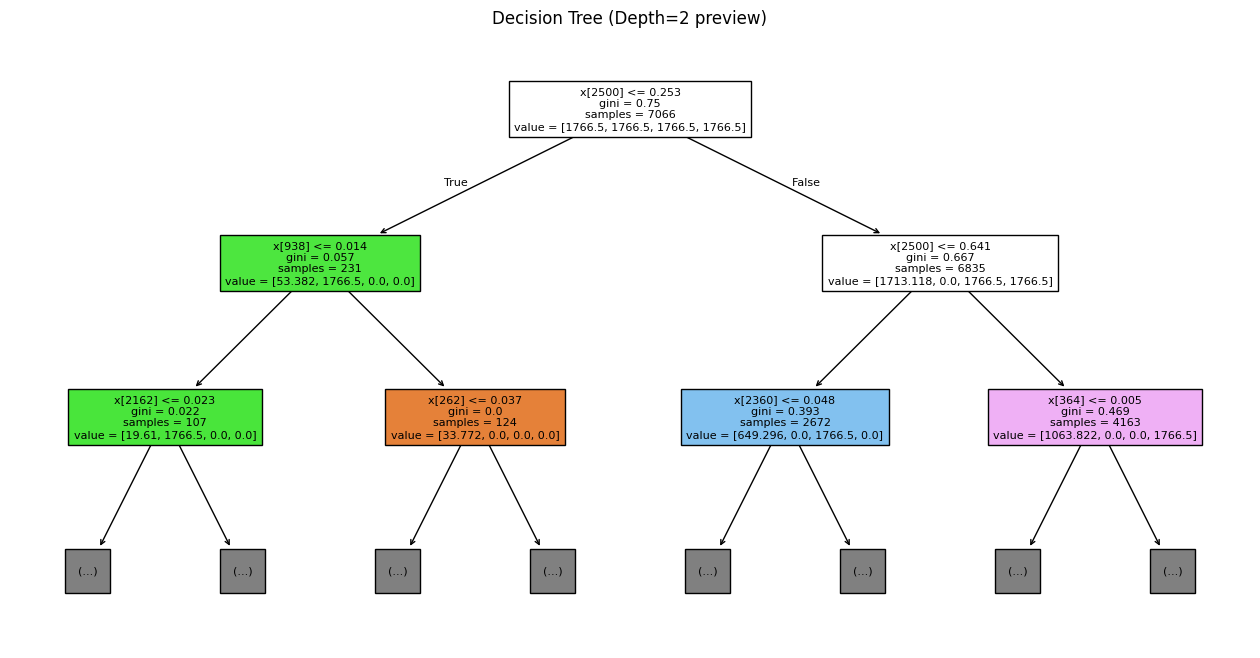

In [57]:
# ===== Baseline Model: Decision Tree + TF-IDF =====
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack
import matplotlib.pyplot as plt

# --- 1. Prepare features and labels ---
X_text = df["description_clean"].fillna("")
y = df["severity_norm"]

# Normalize numerical feature (CVSS score)
scaler = MinMaxScaler()
cvss_scaled = scaler.fit_transform(df[["cvss_score"]].fillna(df["cvss_score"].mean()))

# --- 2. Split data ---
X_train_text, X_test_text, y_train, y_test, cvss_train, cvss_test = train_test_split(
    X_text, y, cvss_scaled, test_size=0.2, random_state=42, stratify=y
)

# --- 3. TF-IDF vectorization ---
vectorizer = TfidfVectorizer(max_features=2500, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# Combine text features with numeric feature (cvss)
X_train = hstack([X_train_tfidf, cvss_train])
X_test = hstack([X_test_tfidf, cvss_test])

# --- 4. Train Decision Tree ---
tree_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=10,
    class_weight="balanced",
    random_state=42
)
tree_model.fit(X_train, y_train)

# --- 5. Evaluate ---
y_pred = tree_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- 6. Optional: Visualize a small tree (using limited features for clarity) ---
plt.figure(figsize=(16, 8))
plot_tree(tree_model, max_depth=2, filled=True, fontsize=8)
plt.title("Decision Tree (Depth=2 preview)")
plt.show()
